In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary", conn)

In [4]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [7]:
#EDA

df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10693.0,1.064989e+04,18752.805318,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10693.0,1.803774e+04,12662.525384,58.00,5789.000000,18761.000000,25514.000000,9.063100e+04
PurchasePrice,10693.0,2.438302e+01,109.264519,0.00,6.840000,10.450000,19.470000,5.681810e+03
ActualPrice,10693.0,3.564034e+01,148.239484,0.00,10.990000,15.990000,28.990000,7.499990e+03
Volume,10693.0,8.473514e+02,664.278813,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10693.0,3.140782e+03,11094.573249,1.00,36.000000,262.000000,1978.000000,3.376600e+05
TotalPurchaseDollars,10693.0,3.010388e+04,123062.388765,0.00,453.180000,3655.230000,20733.420000,3.811252e+06
TotalSalesQuantity,10693.0,3.077356e+03,10952.346909,0.00,33.000000,261.000000,1929.000000,3.349390e+05
TotalSalesDollars,10693.0,4.224431e+04,167648.300465,0.00,729.270000,5298.210000,28406.050000,5.101920e+06
TotalSalesPrice,10693.0,1.879769e+04,44952.483000,0.00,289.710000,2857.800000,16075.380000,6.728193e+05


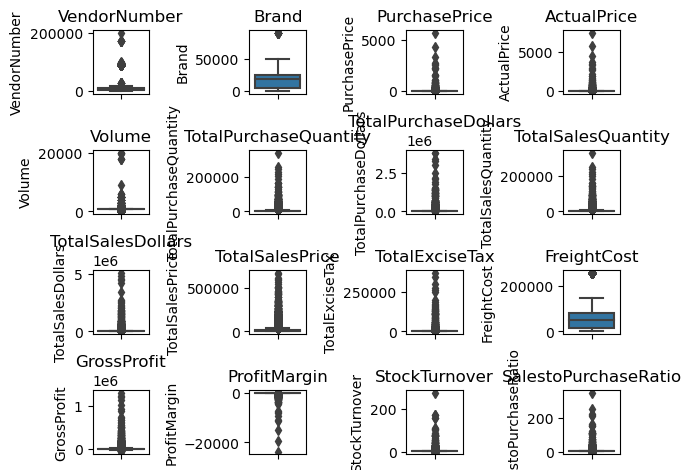

In [10]:
#Outliers Detection by BOxPLOT
numerical_cols = df.select_dtypes(include=np.number).columns
plt.Figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [11]:
# Lets filter the data by removing inconsistencies
df = pd.read_sql_query("select * from vendor_sales_summary where GrossProfit >0 AND ProfitMargin >0 AND TotalSalesQuantity >0", conn)

In [12]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388
8564,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,1,0.71,86.0,8.514000e+01,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493


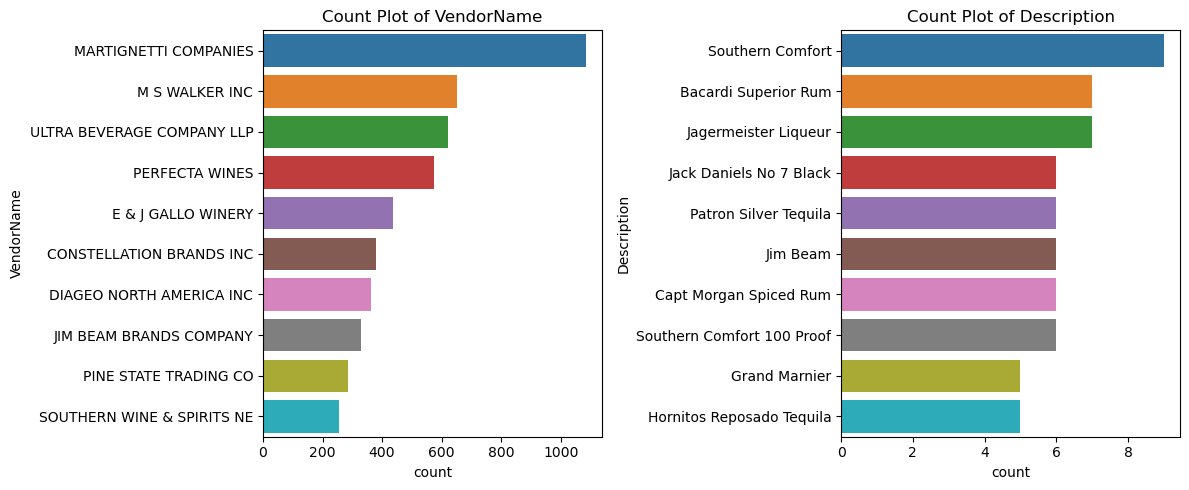

In [20]:
#Count Plots for Categorical Column
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) #Top 10 categoires
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

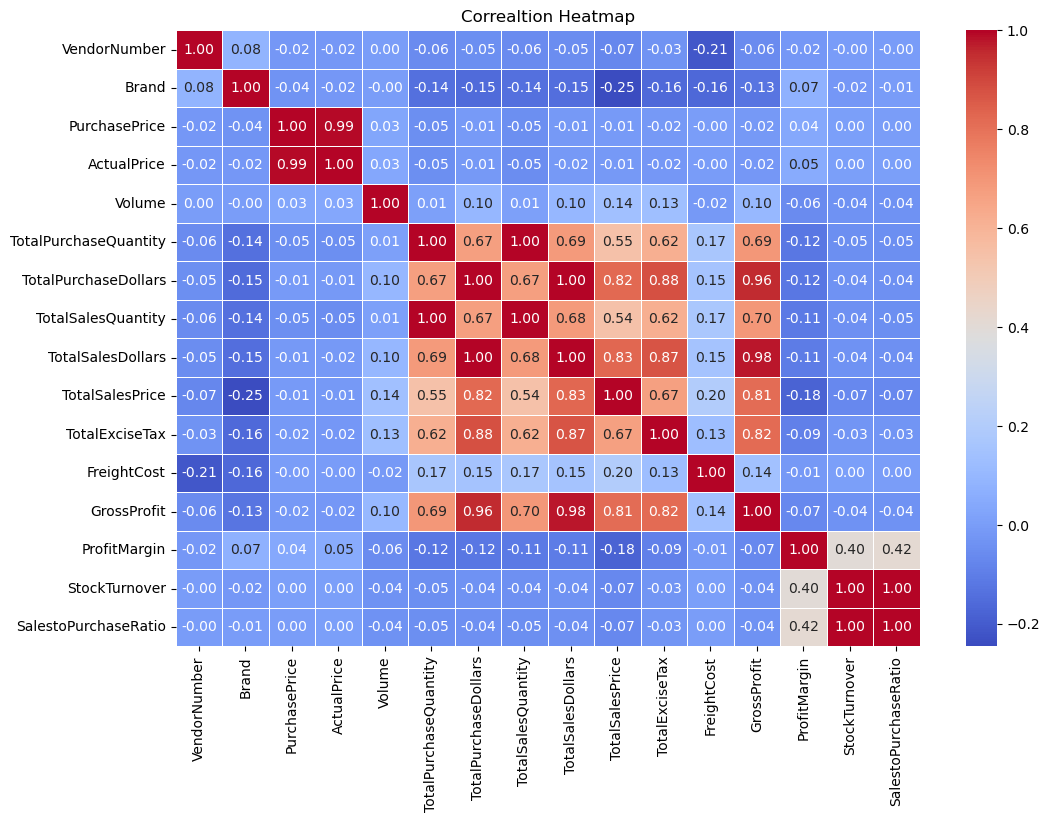

In [21]:
#Correaltion Heatmap between the two numerical values
plt.figure(figsize=(12,8))
correlation_Matrix = df[numerical_cols].corr()
sns.heatmap(correlation_Matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correaltion Heatmap")
plt.show()

## Data Analysis

##### Qno.1 Identify Brands the needs Promotional or Pricing Adjustment which exhibit lower sales performance but higher profit margins

In [28]:
brand_performance = df.groupby('Description').agg({'TotalSalesDollars':'sum', 'ProfitMargin':'mean'}).reset_index()
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7703,Zorvino Vyds Sangiovese,10579.03,29.525675
7704,Zuccardi Q Malbec,1639.18,23.981503
7705,Zum Rsl,10857.34,32.675038
7706,Zwack Liqueur,227.88,16.653502


In [29]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_sales_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [30]:
low_sales_threshold

560.357

In [31]:
high_sales_threshold

65.03587868318031

In [33]:
#Filter brands with low sales and high profit margin

target_brands = brand_performance[( brand_performance['TotalSalesDollars']<=low_sales_threshold) & (brand_performance['ProfitMargin']>= high_sales_threshold)]

print("Brands with Low Sales but HIght Profit Margins: ")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but HIght Profit Margins: 


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


##### Qno.2 Which Vendor demonstrate the higest sales performance

In [36]:
def format_dollars(value):
    if value >=1_000_000:
        return f"{value /1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)


In [37]:
#Top Vendors & Brands by sales Performace
top_vendors = df.groupby("VendorName")['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [38]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [39]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

##### Qno.3 Which vendors contribute the most to total purchase dollars?

In [40]:
vendor_performance = df.groupby('VendorName').agg({
    "TotalPurchaseDollars" : "sum",
    "GrossProfit":"sum",
    "TotalSalesDollars": "sum"
}).reset_index()

In [41]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [44]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()

In [52]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2)

In [ ]:
#Display Top 5 vendors
top_vendors = vendor_performance.head(5)
top_vendors["TotalSalesDollars"] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors["TotalPurchaseDollars"] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors["GrossProfit"] = top_vendors['GrossProfit'].apply(format_dollars)

In [54]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.08
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06


In [57]:
top_vendors['PurchaseContribution%'].sum()

0.46

##### How Much of total procurement is dependent on the top vendors?

In [58]:
print(f"Total Purchase contribution of top 5 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase contribution of top 5 vendors is 0.46%


##### Does purchasing in bulk reduce the unit price and whatis the optimal purchase volumen foir the cost savings?

In [59]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/ df['TotalPurchaseQuantity']

In [60]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=["Small", "Medium","Large"])

In [62]:
df.groupby("OrderSize")[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
Large,10.773852


In [ ]:
#Export a CSV Files for the PowerBI visulization
df.to_csv('vendor_sales_summary.csv', index=False)
